# Task 4 - Implement 10.16 and 15.4

Author: [Mee Vang](https://github.com/meevang)
Repository: [datafun-07-ml-predictive](https://github.com/meevang/datafun-07-ml-predictive)

### Part 1 - Linear Regression

In [103]:
%matplotlib inline

c = lambda f: 5 / 9 * (f - 32)

temps = [(f, c(f)) for f in range(0, 101, 10)]


In [104]:
import pandas as pd

temps_df = pd.DataFrame(temps, columns=['Fahrenhiet', 'Celsius'])

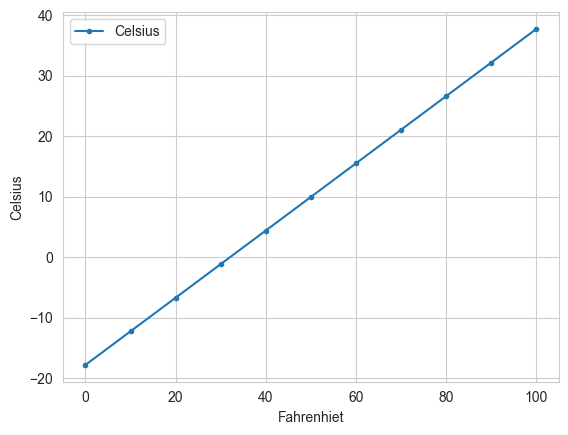

In [105]:
axes = temps_df.plot(x='Fahrenhiet', y='Celsius', style='.-')

y_label = axes.set_ylabel('Celsius')


#### Section 1 - Load: Follow the instructions to load NY City January high temperature from a csv file into a DataFrame.

In [106]:
import pandas as pd

nyc = pd.read_csv('ave_hi_nyc_jan_1895-2018.csv')

### Section 2 - View: Follow the instructions to view head and tail of the file. 

In [107]:
nyc.head()

,Date,Value,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9
3,189801,39.6,2.2
4,189901,36.4,-1.0


In [108]:
nyc.tail()

,Date,Value,Anomaly
119,201401,35.5,-1.9
120,201501,36.1,-1.3
121,201601,40.8,3.4
122,201701,42.8,5.4
123,201801,38.7,1.3


### Section 3 - Clean: Follow the instructions to clean the data.

In [109]:
nyc.columns = ['Date', 'Temperature', 'Anomaly']

nyc.head(3)

,Date,Temperature,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9


In [110]:
nyc.Date.dtype

dtype('int64')

In [111]:
nyc.Date = nyc.Date.floordiv(100)

nyc.head(3)

,Date,Temperature,Anomaly
0,1895,34.2,-3.2
1,1896,34.7,-2.7
2,1897,35.5,-1.9


### Section 4 - Describe: Use describe() to calculate basic descriptive statistics for the dataset. 

In [112]:
pd.set_option('display.precision', 2)

nyc.Temperature.describe()

count    124.00
mean      37.60
std        4.54
min       26.10
25%       34.58
50%       37.60
75%       40.60
max       47.60
Name: Temperature, dtype: float64

### Section 5 - Calculate Line: Use the SciPy stats module linregress function to calculate slope and intercept for the best fit line through the data.

In [113]:
from scipy import stats

linear_regression = stats.linregress (x=nyc.Date,
                                    y=nyc.Temperature)

In [114]:
linear_regression.slope

0.014771361132966163

In [115]:
linear_regression.intercept

8.694993233674289

### Section 6 - Predict: Use your results to predict the "average high temp in Jan" for the year 2026. 

In [116]:
linear_regression.slope * 2026 + linear_regression.intercept

38.62177088906374

### Section 7 - Plot: Follow the instructions and use Seaborn to generate a scatter plot with a best fit line. Set the axes and y limit as instructed.

(10.0, 70.0)

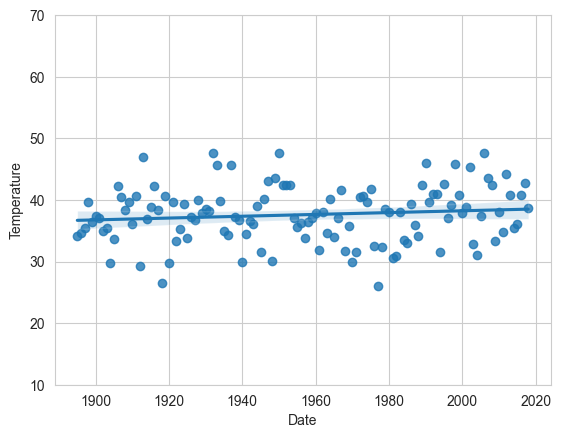

In [117]:
import seaborn as sns

sns.set_style('whitegrid')

axes = sns.regplot(x=nyc.Date, y=nyc.Temperature)

axes.set_ylim(10, 70)

### Part 2 - Machine Learning

### Section 1 - Load: Follow the instructions to load NY City January high temperature from a csv file into a DataFrame.

In [118]:
import pandas as pd

nyc = pd.read_csv('ave_hi_nyc_jan_1895-2018.csv')

nyc.columns = ['Date', 'Temperature', 'Anomaly']

nyc.Date = nyc.Date.floordiv(100)

nyc.head(3)

,Date,Temperature,Anomaly
0,1895,34.2,-3.2
1,1896,34.7,-2.7
2,1897,35.5,-1.9


### Section 2 - Splitting the Data for Training and Testing

In [119]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    nyc.Date.values.reshape(-1, 1), nyc.Temperature.values,
    random_state=11)

X_train.shape

(93, 1)

In [120]:
X_test.shape

(31, 1)

### Section 3 - Training the Model

In [121]:
from sklearn.linear_model import LinearRegression

linear_regression = LinearRegression()

linear_regression.fit(X=X_train, y=y_train)

LinearRegression()

In [122]:
linear_regression.coef_

array([0.01939167])

In [123]:
linear_regression.intercept_

-0.30779820252656975

### Section 4 - Testing the model

In [124]:
predicted = linear_regression.predict(X_test)

expected = y_test

for p, e in zip(predicted[::5], expected[::5]):
    print(f'predicted: {p:.2f}, expected: {e:.2f}')

predicted: 37.86, expected: 31.70
predicted: 38.69, expected: 34.80
predicted: 37.00, expected: 39.40
predicted: 37.25, expected: 45.70
predicted: 38.05, expected: 32.30
predicted: 37.64, expected: 33.80
predicted: 36.94, expected: 39.70


### Section 5 - Predicting Future Temperatures and Estimating Past Temperatures

In [125]:
predict = (lambda x: linear_regression.coef_ * x +
           linear_regression.intercept_)

predict(2026)

array([38.97973189])

In [126]:
predict(1890)

array([36.34246432])

### Section 6 - Visualizing the Dataset with the Regression Line

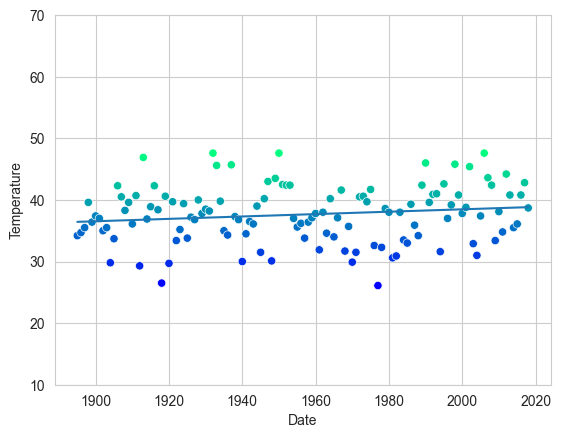

In [133]:
import seaborn as sns

axes = sns.scatterplot(data=nyc, x='Date', y='Temperature',
    hue='Temperature', palette='winter', legend=False)

axes.set_ylim(10, 70)

import numpy as np

x = np.array([min(nyc.Date.values), max(nyc.Date.values)])

y = predict(x)

import matplotlib.pyplot as plt

line = plt.plot(x, y)

### Conclusion: I found SciPY to be more like algebra and easier to comprehend.  Scikit-learn was more sophisticated in analytical and artificial intelligence.  Both results are same.